In [1]:
import numpy as np 
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import levy_stable
from scipy.stats import uniform

np.random.seed(124)
n=1000
u = np.random.uniform(low = -np.pi/2, high = np.pi/2, size = n)
np.random.seed(124)
u = np.random.uniform(low = -np.pi/2, high = np.pi/2, size = n)
w = np.random.standard_exponential(size=n)

# On définit en premier lieu les S et B pour plus de clarté
def S(alpha, beta): 
    tan_term = np.tan(np.pi * alpha / 2)**2
    result = (1 + beta**2 * tan_term)**(1 / (2 * alpha))
    return result

def B(alpha, beta):
    tan_term = beta * np.tan(np.pi * alpha / 2)
    result = 1 / alpha * np.arctan(tan_term)
    return result

def calculate_y_barre(alpha, beta, u, w):
    if alpha != 1:
        S_alpha_beta = S(alpha, beta)
        B_alpha_beta = B(alpha, beta)
        sin_alpha = np.sin(alpha)
        cos_u = np.cos(u)
        term1 = S_alpha_beta * (sin_alpha * (u + B_alpha_beta))
        term2 = (cos_u) ** (1 / alpha)
        term3 = np.cos(u - alpha * (u + B_alpha_beta)) / w
        term4 = ((1 - alpha) / alpha)
        y_barre = (term1 / term2) * np.sign(term3)* (np.abs(term3) ** term4)
    else:
        term1 = (np.pi / 2 + beta * u) * np.tan(u)
        term2 = beta * np.log((np.pi / 2) * w * np.cos(u) / (np.pi / 2 + beta * u))
        y_barre = 2 / np.pi * (term1 - term2)
    return y_barre

def transformation(alpha, beta, gamma, delta, u, w):
    y_barre = calculate_y_barre(alpha, beta, u, w)
    y = gamma * y_barre + delta
    return y

[ 2.10092244e+00  1.55986625e-03  1.49900550e+02 -7.60107699e-03] [[ 2.19762701e+00  4.30378733e-01  1.80829013e+02  2.69299098e+01]
 [ 1.93404401e+00  4.40648987e-01  3.43124452e-02 -1.18600456e+02]
 [ 1.97198980e+00 -9.48147536e-01  1.64898743e+02 -3.88065644e+01]
 ...
 [ 2.86829404e+00 -6.73946560e-03  5.06686534e+01  2.78255457e+02]
 [ 1.24753969e+00 -7.46623624e-02  2.24456051e+01 -1.08449604e+02]
 [ 1.51413275e+00  9.76331472e-01  2.48076332e+02 -2.46963236e+02]]


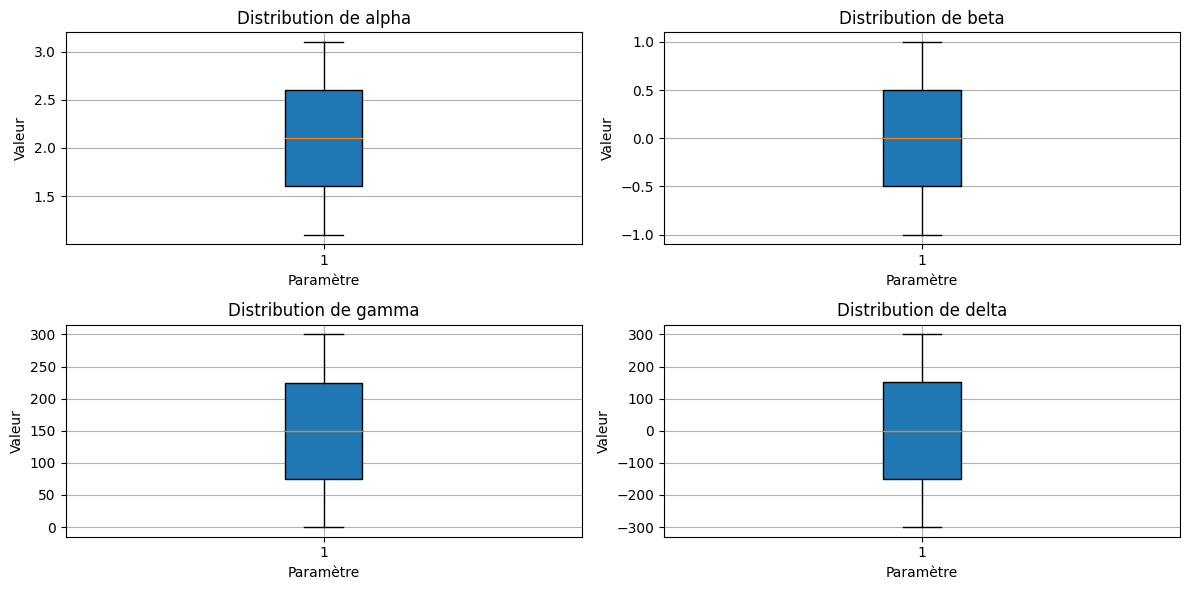

In [2]:
import numpy as np 
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import levy_stable
from scipy.stats import uniform
from scipy.stats import multivariate_normal
# Fixer la graine du générateur de nombres aléatoires pour la reproductibilité
np.random.seed(124)

# Définir une fonction pour échantillonner à partir de la distribution priori
def prior_sample(seed):
    # Fixer la graine pour chaque échantillonnage pour garantir la reproductibilité
    np.random.seed(seed)
    # Échantillonner chaque paramètre de la distribution uniforme spécifiée
    alpha = uniform.rvs(1.1, 2)    # U[1.1, 2]
    beta = uniform.rvs(-1, 2)      # U[-1, 1]
    gamma = uniform.rvs(0, 300)    # U[0, 300]
    delta = uniform.rvs(-300, 600) # U[-300, 300]
    return [alpha, beta, gamma, delta]

# Définir les paramètres alpha, beta, gamma et delta du modèle alpha-stable
alpha = 1.7
beta = 0.9
gamma = 10
delta = 10

# Générer des données observées à partir de la distribution alpha-stable
y = levy_stable.rvs(alpha, beta, loc=delta, scale=gamma, size=n)

# Définir une fonction de distance S utilisant la distance gaussienne
def distance_S(x, y, alpha, beta, gamma, delta):
    # Calculer S(x) et S(y) (non défini dans le code fourni)
    S_x = calculate_y_barre(alpha, beta, u, w)
    S_y = calculate_y_barre(alpha, beta, u, w)
    # Calculer la distance en utilisant la distance gaussienne
    distance = (S_x - S_y)**2
    return distance

# Initialiser une liste pour stocker les paramètres acceptés
thetas_acceptes = []

# Définir le nombre d'itérations N et le seuil de distance
N = 100000
seuil_distance = 0.1  

# Itérer sur N
for i in range(N):
    # Échantillonner un theta à partir de la distribution priori
    theta = prior_sample(seed=i)
    # Générer un échantillon x (non défini dans le code fourni)
    x = transformation(*theta, u, w)
    # Calculer la distance entre x et y
    dist = distance_S(x, y, *theta)
    # Vérifier si la distance est inférieure au seuil
    if np.all(dist < seuil_distance):
        # Si oui, ajouter le paramètre theta à la liste des paramètres acceptés
        thetas_acceptes.append(theta)


param_estimates = np.mean(thetas_acceptes, axis=0)
theta_estimates = np.array(thetas_acceptes)
print (param_estimates, theta_estimates)
# Définir les étiquettes des paramètres
param_labels = ['alpha', 'beta', 'gamma', 'delta']

# Tracer des boxplots pour chaque paramètre
plt.figure(figsize=(12, 6))
for i in range(len(param_labels)):
    plt.subplot(2, 2, i+1)
    plt.boxplot(theta_estimates[:, i], patch_artist=True)
    plt.xlabel('Paramètre')
    plt.ylabel('Valeur')
    plt.title(f'Distribution de {param_labels[i]}')
    plt.grid(True)

# Ajuster la mise en page pour éviter les chevauchements
plt.tight_layout()
plt.show()